In [65]:
import pandas as pd
import numpy as np
import plotly.express as py
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
df=pd.read_csv("C:/data/Default_Fin.csv")

In [67]:
df.shape

(10000, 5)

In [68]:
df.head()

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,1,8754.36,532339.56,0
1,2,0,9806.16,145273.56,0
2,3,1,12882.60,381205.68,0
3,4,1,6351.00,428453.88,0
4,5,1,9427.92,461562.00,0


In [69]:
df.isna().sum()
#No missing values

Index            0
Employed         0
Bank Balance     0
Annual Salary    0
Defaulted?       0
dtype: int64

In [70]:
df.drop("Index",axis=1,inplace=True)

In [71]:
df["Defaulted?"].value_counts()
#Imbalanced Dataset

0    9667
1     333
Name: Defaulted?, dtype: int64

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Employed       10000 non-null  int64  
 1   Bank Balance   10000 non-null  float64
 2   Annual Salary  10000 non-null  float64
 3   Defaulted?     10000 non-null  int64  
dtypes: float64(2), int64(2)
memory usage: 312.6 KB


<AxesSubplot:xlabel='Employed', ylabel='count'>

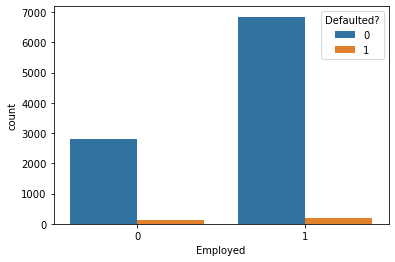

In [73]:
sns.countplot(x="Employed",data=df,hue="Defaulted?")
#No conclusive relation

<AxesSubplot:>

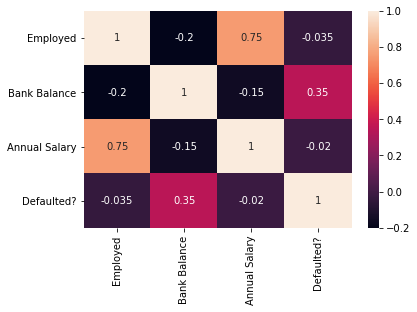

In [74]:
sns.heatmap(df.corr(),annot=True)

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [76]:
X=df.iloc[:,0:3]
Y=df["Defaulted?"]

In [77]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.25,random_state=42)

In [78]:
scaler=MinMaxScaler()

In [79]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
#To avoid data leakage we only transform the test data and fit the training data

In [80]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [192]:
model=Sequential()

In [193]:
model.add(Dense(128,activation="relu"))
model.add(Dropout(.3))
model.add(Dense(64,activation="relu"))
model.add(Dropout(.3))
model.add(Dense(1,activation="sigmoid"))

In [194]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [195]:
model.fit(X_train,Y_train,epochs=15,validation_data=(X_test,Y_test))

Epoch 1/15
235/235 [==============================] - 1s 3ms/step - loss: 0.1905 - accuracy: 0.9641 - val_loss: 0.1244 - val_accuracy: 0.9676
Epoch 2/15
235/235 [==============================] - 1s 2ms/step - loss: 0.1102 - accuracy: 0.9664 - val_loss: 0.0906 - val_accuracy: 0.9676
Epoch 3/15
235/235 [==============================] - 0s 2ms/step - loss: 0.0900 - accuracy: 0.9685 - val_loss: 0.0856 - val_accuracy: 0.9672
Epoch 4/15
235/235 [==============================] - 1s 2ms/step - loss: 0.0887 - accuracy: 0.9699 - val_loss: 0.0894 - val_accuracy: 0.9688
Epoch 5/15
235/235 [==============================] - 0s 2ms/step - loss: 0.0870 - accuracy: 0.9701 - val_loss: 0.0804 - val_accuracy: 0.9700
Epoch 6/15
235/235 [==============================] - 0s 2ms/step - loss: 0.0854 - accuracy: 0.9709 - val_loss: 0.0803 - val_accuracy: 0.9720
Epoch 7/15
235/235 [==============================] - 1s 2ms/step - loss: 0.0870 - accuracy: 0.9716 - val_loss: 0.0803 - val_accuracy: 0.9708
Epoch 

In [196]:
data=pd.DataFrame(model.history.history)
data

,loss,accuracy,val_loss,val_accuracy
0,0.190473,0.964133,0.124429,0.9676
1,0.110216,0.966400,0.090563,0.9676
2,0.090026,0.968533,0.085561,0.9672
3,0.088680,0.969867,0.089443,0.9688
4,0.086996,0.970133,0.080391,0.9700
5,0.085357,0.970933,0.080259,0.9720
6,0.086992,0.971600,0.080327,0.9708
7,0.085759,0.971733,0.084838,0.9684
8,0.085326,0.971333,0.083210,0.9704
9,0.084485,0.971867,0.079934,0.9736


<AxesSubplot:>

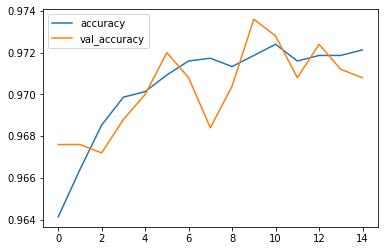

In [197]:
data[["accuracy","val_accuracy"]].plot()
#Therefore no overfitting as val_accuracy and accuracy as nearly same

<AxesSubplot:>

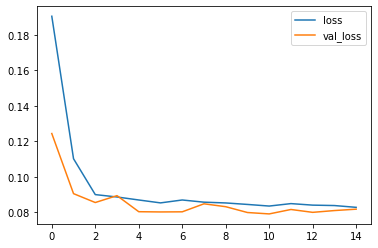

In [198]:
data[["loss","val_loss"]].plot()
#Clear indication that val_loss and loss are declining (a litlle bit of noise is present in val_loss)

In [199]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [200]:
y_pred=model.predict_classes(X_test)

C:\Users\yasha\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [205]:
print(classification_report(Y_test,y_pred))
#Since the dataset is highly imbalanced therefore recall becomes an important factor so as to reduce the false negative cases

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2419
           1       0.61      0.28      0.39        81

    accuracy                           0.97      2500
   macro avg       0.79      0.64      0.69      2500
weighted avg       0.96      0.97      0.97      2500



In [202]:
confusion_matrix(Y_test,y_pred)

array([[2404,   15],
       [  58,   23]], dtype=int64)

In [203]:
accuracy_score(Y_test,y_pred)

0.9708